- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


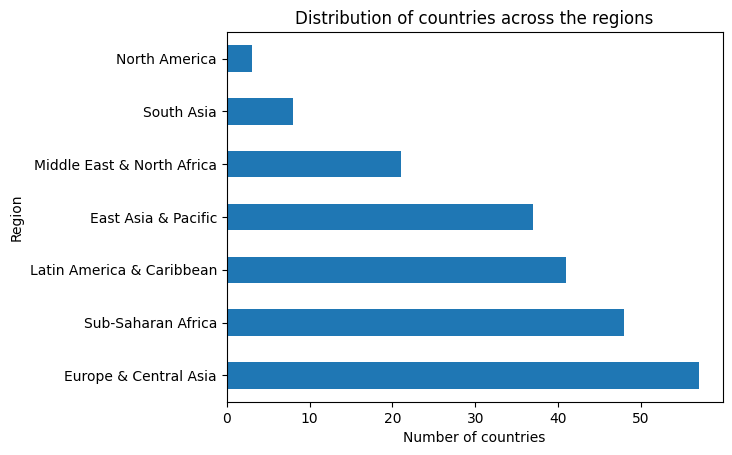

In [3]:
# Vẽ barplot cho các Region
# Tính số lượng các quốc gia trong mỗi Region, rồi sort theo thứ tự tăng dần và vẽ barplot theo chiều horizontal
region_count = world_df['Region'].value_counts().sort_values(axis=0,ascending=False)
region_count.plot(kind='barh')

plt.xlabel('Number of countries')
plt.ylabel('Region')
plt.title('Distribution of countries across the regions')
plt.show()

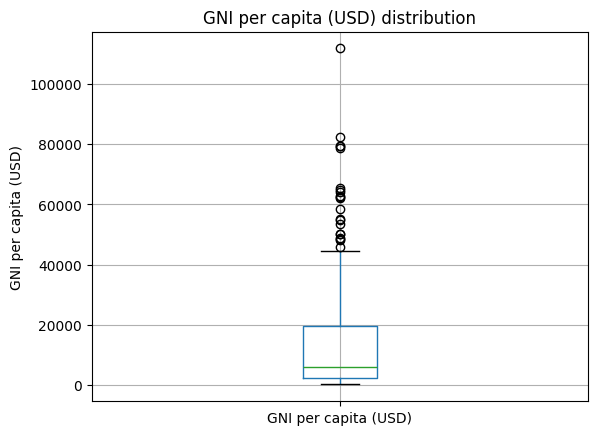

In [4]:
# Vẽ boxplot cho 'GNI per capita (USD)'

world_df.boxplot(column='GNI per capita (USD)')
plt.ylabel('GNI per capita (USD)')
plt.title('GNI per capita (USD) distribution')
plt.show()

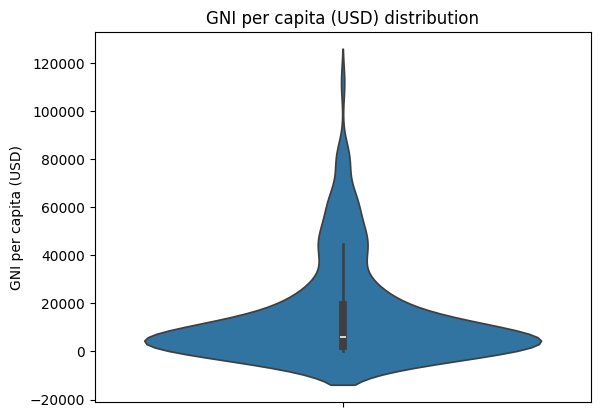

In [5]:
# Vẽ violinplot cho 'GNI per capita (USD)'
# dùng thi viện seaborn để vẽ violinplot
sns.violinplot(data=world_df, y='GNI per capita (USD)')
plt.ylabel('GNI per capita (USD)')
plt.title('GNI per capita (USD) distribution')
plt.show()

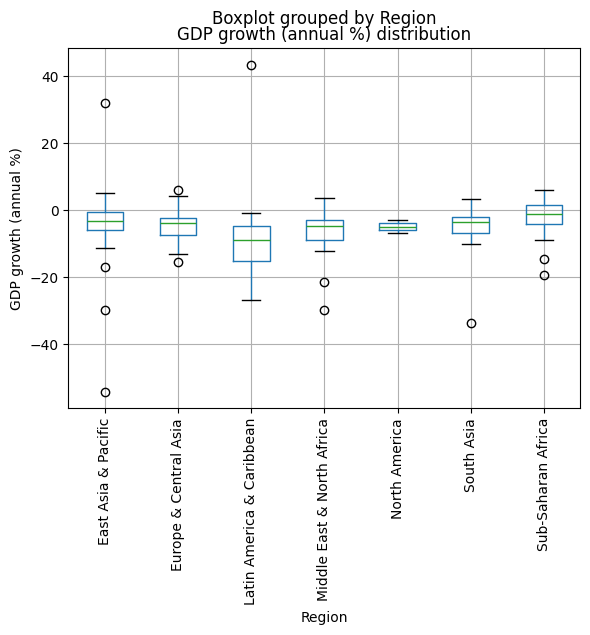

In [6]:
# Vẽ boxplot của 'GDP growth (annual %)' thuộc các Region lên cùng một biểu đồ

# Group các quốc gia theo Region, rồi vẽ boxplot cho GDP growth (annual %) của các Region
world_df.boxplot(column='GDP growth (annual %)', by='Region')
plt.xticks(rotation=90);
plt.ylabel('GDP growth (annual %)')
plt.title('GDP growth (annual %) distribution')
plt.show()

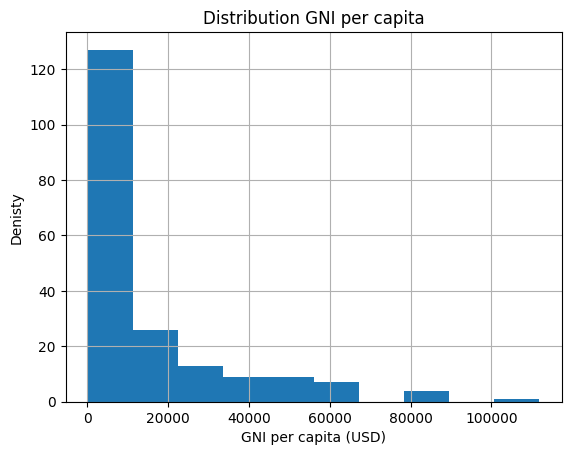

In [7]:
# Vẽ histogram của 'GNI per capita (USD)'

world_df['GNI per capita (USD)'].hist()
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Denisty')
plt.title('Distribution GNI per capita')
plt.show()

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

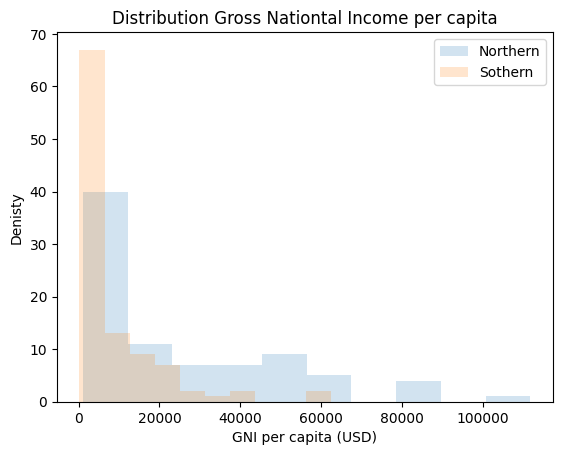

In [8]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# Phân tách ra làm 2 nhóm Northern và Sothern, với các Region như sau
Northern = world_df[world_df['Region'].isin(['Europe & Central Asia','North America','East Asia & Pacific'])]
Sothern  = world_df[world_df['Region'].isin(['Sub-Saharan Africa','Latin America & Caribbean','Middle East & North Africa', 'Suth Asia'])]
# Vẽ 2 histogram lên cùng một biểu đồ, đặt độ trong suốt alpha=0.3, để dễ nhìn
plt.hist(Northern['GNI per capita (USD)'], alpha=0.2, label='Northern')
plt.hist(Sothern['GNI per capita (USD)'], alpha=0.2, label='Sothern')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Denisty')
plt.legend()
plt.title('Distribution Gross Nationtal Income per capita')
plt.show()


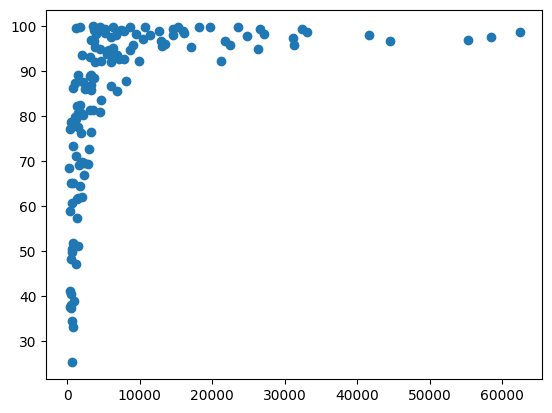

In [9]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'

plt.scatter(world_df['GNI per capita (USD)'], world_df['Adult literacy rate'])

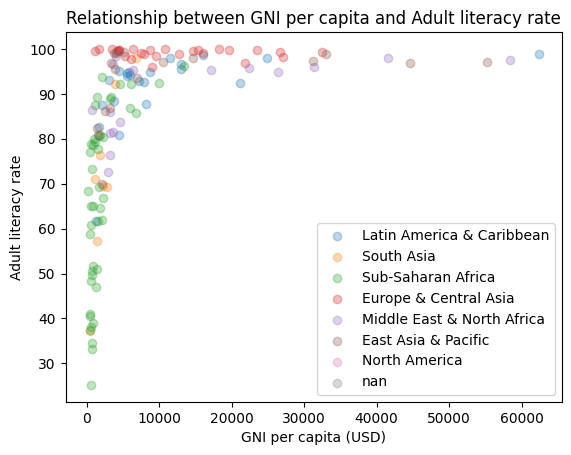

In [10]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau

regions = world_df['Region'].unique()

# Vẽ một scatter plot cho mỗi region
for region in regions:
    plt.scatter(world_df[world_df['Region'] == region]['GNI per capita (USD)'], 
                world_df[world_df['Region'] == region]['Adult literacy rate'], 
                alpha=0.3, label=region)

# Đặt tên cho các trục
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')

# Đặt tiêu đề cho biểu đồ
plt.title('Relationship between GNI per capita and Adult literacy rate')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


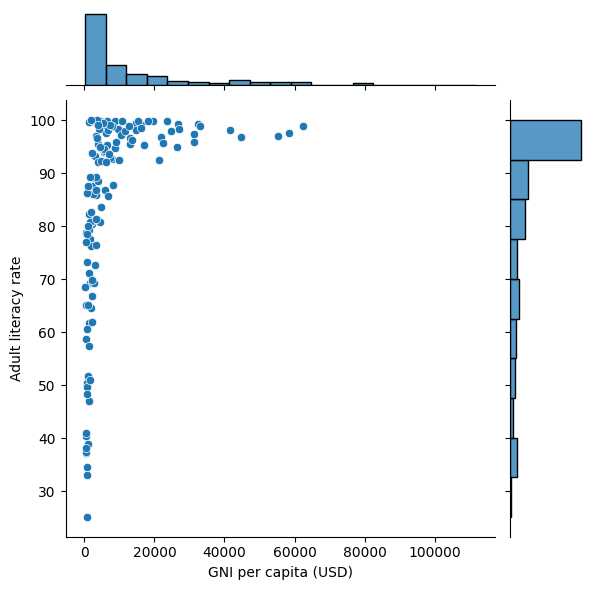

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục

# Vẽ scatter plot và histogram
g = sns.jointplot(x='GNI per capita (USD)', y='Adult literacy rate', data=world_df, kind='scatter')

# Hiển thị biểu đồ
plt.show()
